In [2]:
import  pandas as pd
import seaborn as sns
import  pandas as pd
import matplotlib.pyplot as plt
import rpy2
from rpy2.robjects import r, pandas2ri


/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [41]:
!wget https://github.com/BostonGene-education/MIPT/blob/main/2020/RNA-Seq/data/01.%20RPKM.tsv?raw=true
!tar xfv "01. RPKM.tsv?raw=true"


--2020-12-08 14:02:06--  https://github.com/BostonGene-education/MIPT/blob/main/2020/RNA-Seq/data/01.%20RPKM.tsv?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/BostonGene-education/MIPT/raw/main/2020/RNA-Seq/data/01.%20RPKM.tsv [following]
--2020-12-08 14:02:06--  https://github.com/BostonGene-education/MIPT/raw/main/2020/RNA-Seq/data/01.%20RPKM.tsv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BostonGene-education/MIPT/main/2020/RNA-Seq/data/01.%20RPKM.tsv [following]
--2020-12-08 14:02:06--  https://raw.githubusercontent.com/BostonGene-education/MIPT/main/2020/RNA-Seq/data/01.%20RPKM.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubuser

In [42]:
#Задание 1 с матрицами
RPKM = pd.read_csv('01. RPKM.tsv?raw=true', sep = '\t')

RPKM.columns = ['Имя гена','Образец 1','Образец 2','Образец 3']
RPKM.head()

def RPKM_to_TPM(RPKM):
  """
  Вывод формулы:
  Введу обозначения - данные в таблице в строке i до нормировки будем звать х[i] (считаем, для 1 столбика)
  l[i] - длина i гена
  r[i] - rpkm[i]
  t[i] - tpm[i]


  r[i] = x[i]/l[i] / sum(x[i]) * 10**6
  t[i] = x[i]/l[i] / sum(x[i] / l[i]) * 10**6
  Если просуммировать r[i], то получится sum(x[i]/l[i]) / sum(x[i])
  Значит t[i] = r[i] / sum(r[i]) * 10**6
  Обратно перевести так просто не удастся, тк нужна инфа о длине каждого каунта
  """
  summ = RPKM.sum()
  nump = RPKM.to_numpy()
  #for i in range()
  nump[:,1] = nump[:,1] / summ[1] *10**(6) 
  nump[:,2] = nump[:,2] / summ[2] *10**(6) 
  nump[:,3] = nump[:,3] / summ[3] *10**(6) 
  TPM = pd.DataFrame(nump)  
  return TPM

In [43]:
#Проверим, что сумма это 1000000
tpm = RPKM_to_TPM(RPKM)

summ = tpm.sum()
print(summ[1:])
tpm.head()

1    1e+06
2    1e+06
3    1e+06
dtype: object


,0,1,2,3
0,A1BG,3.36259,3.22684,2.66688
1,A1BG-AS1,11.8458,6.93472,5.53472
2,A1CF,0.0325562,0,0
3,A2M,0.827858,19.238,6.47859
4,A2M-AS1,0.10697,0.700253,0.322859


In [44]:
#Я в общем успел сделать Задание 2, когда надо было просто просуммировать эксперссию по транскриптам, пришедшим с 1 гена. 
#И было бы очень обидно, если мои старания пропадут, так, что посмотрите, пожалуйста, как получилось 
#(это займёт довольно много времени пока к каждому транскрипту надётся ген, которому он соответствует)
!pip install mygene
import mygene
mg = mygene.MyGeneInfo()

     |████████████████████████████████| 163kB 11.4MB/s 


In [45]:
def transcripts_to_genes(transcripts):
  List = list(transcripts.index)
  for i in range(len(List)):
    List[i] = List[i][:15]

  ginfo = mg.querymany(List, scopes='ensembl.transcript', returnall=False) 

  Dict_of_gene_symbols={}
  for g in ginfo:
    try:
     Dict_of_gene_symbols[g['query']] = g['symbol']
    except:
      continue 

  index = list(transcripts.index)
  for i in range(len(index)):
    index[i] = index[i][:15]
  for i in range(len(index)):
    try:
      index[i] = Dict_of_gene_symbols[index[i]] 
    except:
      continue

  gene = transcripts
  gene.index = index
  gene.index.name = 'gene/tr id'
  gene = gene.groupby(gene.index).sum()

  return gene

In [46]:
#Качаю то дикий тип и нокаут по STK11
!wget https://github.com/BostonGene-education/MIPT/blob/main/2020/RNA-Seq/data/00.%20kallisto%20work.tar.gz?raw=true
!tar xfv "00. kallisto work.tar.gz?raw=true"

--2020-12-08 14:02:47--  https://github.com/BostonGene-education/MIPT/blob/main/2020/RNA-Seq/data/00.%20kallisto%20work.tar.gz?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/BostonGene-education/MIPT/raw/main/2020/RNA-Seq/data/00.%20kallisto%20work.tar.gz [following]
--2020-12-08 14:02:47--  https://github.com/BostonGene-education/MIPT/raw/main/2020/RNA-Seq/data/00.%20kallisto%20work.tar.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BostonGene-education/MIPT/main/2020/RNA-Seq/data/00.%20kallisto%20work.tar.gz [following]
--2020-12-08 14:02:47--  https://raw.githubusercontent.com/BostonGene-education/MIPT/main/2020/RNA-Seq/data/00.%20kallisto%20work.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.

In [47]:
#Для проверки отдадим туда sample_7 - sample_12
expressions_tpm = pd.concat(
    [pd.read_csv(
         'expression_data/{}/abundance.tsv'.format(expression),
        sep="\t", index_col=0, header=0, usecols=["target_id", expression],
        names=["target_id", "1", "2",  expression, "3"]
    ) for expression in ["sample_7","sample_8", "sample_9", "sample_10", "sample_11","sample_12"]],
    axis=1
)
expressions_tpm.columns = ["sample_7", "sample_8", "sample_9", "sample_10", "sample_11", "sample_12"]

In [48]:
genes = transcripts_to_genes(expressions_tpm)
genes.tail()

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-35000...done.
queryin

,sample_7,sample_8,sample_9,sample_10,sample_11,sample_12
gene/tr id,,,,,,
ZYG11B,1496.03000,1348.00760,794.20180,1166.049420,1312.39000,1252.268910
ZYX,6517.99972,5038.98016,5403.00328,4785.979768,5684.99153,7475.993814
ZYXP1,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000
ZZEF1,1276.92433,1295.71587,972.74659,1178.343440,1168.88819,1130.119540
ZZZ3,1629.40580,1651.99933,1070.99993,1385.995150,1709.79904,1932.003960


In [49]:
#Вот теперь идёт новое второе задание
%load_ext rpy2.ipython
pandas2ri.activate()

In [50]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

R[write to console]: Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)

R[write to console]: Installing package(s) 'DESeq2'

R[write to console]: trying URL 'https://bioconductor.org/packages/3.12/bioc/src/contrib/DESeq2_1.30.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2066943 bytes (2.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

In [51]:
%%R
BiocManager::install("tximport")
library(tximport)
library("DESeq2")
library(ggplot2)

R[write to console]: Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)

R[write to console]: Installing package(s) 'tximport'

R[write to console]: trying URL 'https://bioconductor.org/packages/3.12/bioc/src/contrib/tximport_1.18.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 302292 bytes (295 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

In [52]:
%%R
library(readr)
BiocManager::install('tximportData') 

R[write to console]: Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)

R[write to console]: Installing package(s) 'tximportData'

R[write to console]: trying URL 'https://bioconductor.org/packages/3.12/data/experiment/src/contrib/tximportData_1.18.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 426787346 bytes (407.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

In [53]:
%%R
library(tximportData)
dir <-system.file('extdata', package = 'tximportData')
tx2gene <- read_csv(file.path(dir, list.files(dir)[15]))
head(tx2gene)



R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  TXNAME = col_character(),
  GENEID = col_character()
)




             TXNAME            GENEID
1 ENST00000456328.2 ENSG00000223972.5
2 ENST00000450305.2 ENSG00000223972.5
3 ENST00000473358.1 ENSG00000243485.5
4 ENST00000469289.1 ENSG00000243485.5
5 ENST00000607096.1 ENSG00000284332.1
6 ENST00000606857.1 ENSG00000268020.3


In [54]:
%%R
# Подготовка при помощи tximport

files <- c('expression_data/sample_7/abundance.tsv', 'expression_data/sample_8/abundance.tsv', 'expression_data/sample_9/abundance.tsv', 
           'expression_data/sample_10/abundance.tsv','expression_data/sample_11/abundance.tsv','expression_data/sample_12/abundance.tsv')
txi.kallisto.tsv <- tximport(files, type = "kallisto", tx2gene = tx2gene, ignoreAfterBar = TRUE)

names(txi.kallisto.tsv$counts) <- c("sample7","sample8", "sample9", "sample10", "sample11","sample12")

print(type(txi.kallisto.tsv[1][1]))
head(txi.kallisto.tsv$counts)


R[write to console]: Note: importing `abundance.h5` is typically faster than `abundance.tsv`

R[write to console]: reading in files with read_tsv

R[write to console]: 1 
R[write to console]: 2 
R[write to console]: 3 
R[write to console]: 4 
R[write to console]: 5 
R[write to console]: 6 
R[write to console]: 

R[write to console]: transcripts missing from tx2gene: 36664

R[write to console]: summarizing abundance

R[write to console]: summarizing counts

R[write to console]: summarizing length



[1] "list"
          [,1]       [,2]      [,3]      [,4]      [,5]      [,6]
[1,] 2802.8752 3014.55870 2345.8313 3532.9192 3153.1353 3060.7115
[2,]    0.0000    0.00000    0.0000    0.0000    0.0000    0.0000
[3,] 3554.9974 2721.99736 2234.9992 2614.0020 3071.9954 3723.0046
[4,]   84.4519   77.60449   65.9156   90.4706  119.5584  101.4826
[5,]  423.3198  419.52176  371.7666  327.3454  432.0845  352.7564
[6,]    0.0000    0.00000    1.0000    0.0000    2.0000    0.0000


In [55]:
%%R
condition <- c("WT", "WT", "WT", "STK11_del", "STK11_del", "STK11_del")
name <- c("sample_7", "sample_8", "sample_9", "sample_10", "sample_11", "sample_12")
colData <- data.frame(condition, name)
dds <- DESeqDataSetFromTximport(txi.kallisto.tsv, colData, design=~condition)
colnames(dds) <- name
print(dds)

R[write to console]: using counts and average transcript lengths from tximport



class: DESeqDataSet 
dim: 34298 6 
metadata(1): version
assays(2): counts avgTxLength
rownames(34298): ENSG00000000003.14 ENSG00000000005.5 ...
  ENSG00000284742.1 ENSG00000284746.1
rowData names(0):
colnames(6): sample_7 sample_8 ... sample_11 sample_12
colData names(2): condition name


In [56]:
%%R
dds <- DESeq(dds)
res <- results(dds)

R[write to console]: estimating size factors

R[write to console]: using 'avgTxLength' from assays(dds), correcting for library size

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [57]:
%%R
print(dds)

class: DESeqDataSet 
dim: 34298 6 
metadata(1): version
assays(6): counts avgTxLength ... H cooks
rownames(34298): ENSG00000000003.14 ENSG00000000005.5 ...
  ENSG00000284742.1 ENSG00000284746.1
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(6): sample_7 sample_8 ... sample_11 sample_12
colData names(2): condition name


In [58]:
#Упорядочим по p-value_{adj}
%%R
res <- res[order(res$padj),]
head(res)

log2 fold change (MLE): condition WT vs STK11 del 
Wald test p-value: condition WT vs STK11 del 
DataFrame with 6 rows and 6 columns
                     baseMean log2FoldChange     lfcSE      stat      pvalue
                    <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000115414.18 185457.558        3.25716  0.311144  10.46833 1.20753e-25
ENSG00000027869.11    111.941       -3.85378  0.377154 -10.21806 1.64603e-24
ENSG00000118515.11   1091.477        2.29162  0.232822   9.84282 7.36162e-23
ENSG00000118046.14    660.848        2.17458  0.223574   9.72644 2.32590e-22
ENSG00000163739.4     255.055       -3.73442  0.405541  -9.20849 3.30741e-20
ENSG00000197903.7     557.738       -1.68479  0.192560  -8.74941 2.14470e-18
                          padj
                     <numeric>
ENSG00000115414.18 1.66156e-21
ENSG00000027869.11 1.13247e-20
ENSG00000118515.11 3.37653e-19
ENSG00000118046.14 8.00111e-19
ENSG00000163739.4  9.10200e-17
ENSG00000197903.7  4.91851e-15


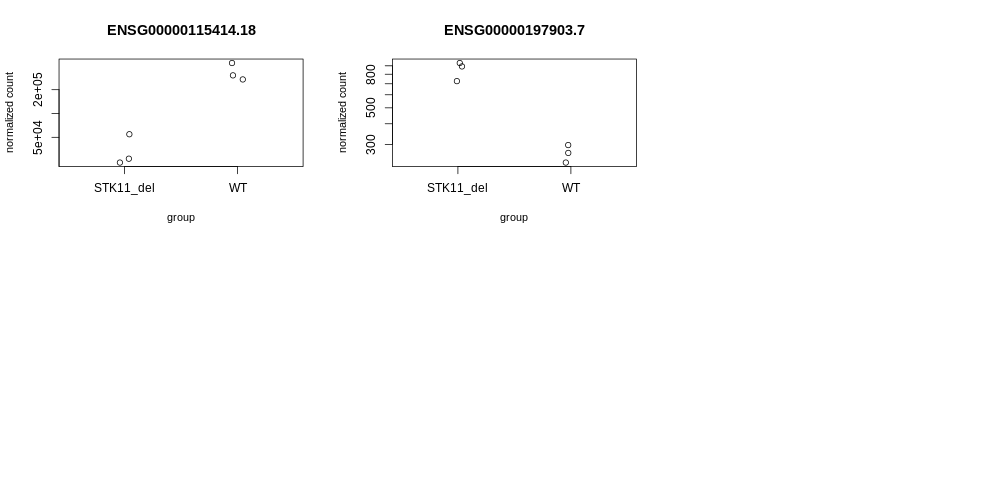

In [59]:
%%R -w 1000
#Задаём размер текста и композицию графика
par(mfrow=c(2,3), cex=1.0, cex.main=1.2, cex.axis=1, cex.lab=0.9)

plotCounts(dds, gene="ENSG00000115414.18", intgroup="condition")#Самая большая уверенность
plotCounts(dds, gene="ENSG00000197903.7", intgroup="condition")#Самая маленькая уверенность

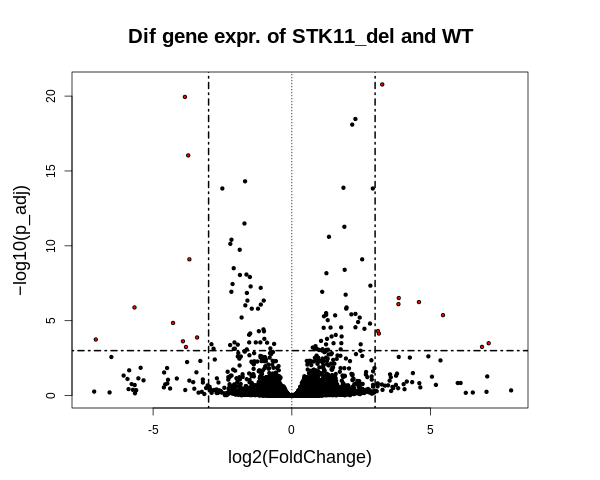

In [78]:
%%R -w 600

#Задаём размер текста и композицию графика
par(mar=c(5,5,5,5), cex=1.0, cex.main=1.7, cex.axis=1, cex.lab=1.5)

#Отрисовываем все точки чёрным цветом
with(res, plot(log2FoldChange, -log10(padj), pch=20, main="Dif gene expr. of STK11_del and WT", cex=1.0, xlab="log2(FoldChange)", ylab="−log10(p_adj)"))

#Отрисовываем точки, прошедшие порог, красным цветом
with(subset(res, padj<0.001 & abs(log2FoldChange)>3), points(log2FoldChange, -log10(padj), pch=20, col="red", cex=0.5))

#Отрисовываем линии с порогами
abline(v=0, col="black", lty=3, lwd=1.0)
abline(v=-3, col="black", lty=4, lwd=2.0)
abline(v=3, col="black", lty=4, lwd=2.0)
abline(h=3, col="black", lty=4, lwd=2.0)

my_subset1 <- subset(res, padj<0.001 & abs(log2FoldChange)>3)
imechki_1 <- rownames(subset(res, padj<0.001 & abs(log2FoldChange)>3))

In [ ]:
#Теперь качаем другие sample для следуещей части

In [61]:
!wget https://github.com/BostonGene-education/MIPT/blob/main/2020/RNA-Seq/data/03.%20kallisto%20hometask.tar.gz?raw=true
!tar xfv "03. kallisto hometask.tar.gz?raw=true"

--2020-12-08 15:21:09--  https://github.com/BostonGene-education/MIPT/blob/main/2020/RNA-Seq/data/03.%20kallisto%20hometask.tar.gz?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/BostonGene-education/MIPT/raw/main/2020/RNA-Seq/data/03.%20kallisto%20hometask.tar.gz [following]
--2020-12-08 15:21:09--  https://github.com/BostonGene-education/MIPT/raw/main/2020/RNA-Seq/data/03.%20kallisto%20hometask.tar.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BostonGene-education/MIPT/main/2020/RNA-Seq/data/03.%20kallisto%20hometask.tar.gz [following]
--2020-12-08 15:21:09--  https://raw.githubusercontent.com/BostonGene-education/MIPT/main/2020/RNA-Seq/data/03.%20kallisto%20hometask.tar.gz
Resolving raw.githubusercontent.com (raw.githubuserconten

In [62]:
#Сперва надо разобраться в каком сэмпле нокаунт по какому гену, гдя этого посмотрим на эксперессию транскриптов с гена STK11
#ENST00000326873.12
#ENST00000585465.2 - 12847
#ENST00000586243.5 - 12848
#ENST00000652231.1 - 12840
#ENST00000585748.2 - 12839
#ENST00000585851.1 - 12844
#ENST00000593219.5 - 12842
#ENST00000589152.5 - 12843
#ENST00000591133.2 - 12846
#ENST00000586358.5 - 12845
table = pd.concat(
    [pd.read_csv(
         'expression_data/{}/abundance.tsv'.format(expression),
        sep="\t", index_col=0, header=0, usecols=["target_id", expression],
        names=["target_id", "1", "2",  expression, "3"]
    ) for expression in ["sample_13","sample_14", "sample_15", "sample_16", "sample_17","sample_18"]],
    axis=1
)
table.columns = ["sample_13","sample_14", "sample_15", "sample_16", "sample_17","sample_18"]

In [63]:
import numpy as np

In [64]:
table.head()
ind = np.array(table.index)
#print(np.where(ind == 'ENST00000326873.12')) С помощью этого вычислил индексы данных транскриптов
#print(ind[:10])
table.loc[table.index[12839:12849]]
Table_STK11 = table.loc[table.index[12839:12849]]
Table_STK11.sum()
#Это уровень эксперессии суммы транскриптов с гена. Я потом узнал, что можно было по ссылке в классном нотвуке пройти, 
#но ответ совпал, так что лишнем не будет

sample_13     464.28853
sample_14     360.90206
sample_15     373.58278
sample_16    1316.00551
sample_17    1406.93640
sample_18    1261.76673
dtype: float64

In [ ]:
#Видим, что в первых трёх экспрессия STK11 намного меньше, значит нокаун по обоим генам в samlpe_13 - sample_15

In [65]:
%%R
files2 <- c('expression_data/sample_7/abundance.tsv', 'expression_data/sample_8/abundance.tsv', 'expression_data/sample_9/abundance.tsv', 
           'expression_data/sample_13/abundance.tsv','expression_data/sample_14/abundance.tsv','expression_data/sample_15/abundance.tsv')
txi.kallisto.tsv2 <- tximport(files2, type = "kallisto", tx2gene = tx2gene, ignoreAfterBar = TRUE)
names(txi.kallisto.tsv2$counts) <- c("sample7","sample8", "sample9", "sample13", "sample14","sample15")

files3 <- c('expression_data/sample_7/abundance.tsv', 'expression_data/sample_8/abundance.tsv', 'expression_data/sample_9/abundance.tsv', 
           'expression_data/sample_16/abundance.tsv','expression_data/sample_17/abundance.tsv','expression_data/sample_18/abundance.tsv')
txi.kallisto.tsv3 <- tximport(files3, type = "kallisto", tx2gene = tx2gene, ignoreAfterBar = TRUE)
names(txi.kallisto.tsv3$counts) <- c("sample7","sample8", "sample9", "sample16", "sample17","sample18")


condition2 <- c("WT", "WT", "WT", "KEAP+STK11_del", "KEAP+STK11_del", "KEAP+STK11_del")
name2 <- c("sample_7", "sample_8", "sample_9", "sample_13", "sample_14", "sample_15")
colData2 <- data.frame(condition2, name2)
dds2 <- DESeqDataSetFromTximport(txi.kallisto.tsv2, colData2, design=~condition2)
colnames(dds2) <- name2
print(dds2)

condition3 <- c("WT", "WT", "WT", "KEAP_del", "KEAP_del", "KEAP_del")
name3 <- c("sample_7", "sample_8", "sample_9", "sample_16", "sample_17", "sample_18")
colData3 <- data.frame(condition3, name3)
dds3 <- DESeqDataSetFromTximport(txi.kallisto.tsv3, colData3, design=~condition3)
colnames(dds3) <- name3
print(dds3)


R[write to console]: Note: importing `abundance.h5` is typically faster than `abundance.tsv`

R[write to console]: reading in files with read_tsv

R[write to console]: 1 
R[write to console]: 2 
R[write to console]: 3 
R[write to console]: 4 
R[write to console]: 5 
R[write to console]: 6 
R[write to console]: 

R[write to console]: transcripts missing from tx2gene: 36664

R[write to console]: summarizing abundance

R[write to console]: summarizing counts

R[write to console]: summarizing length

R[write to console]: Note: importing `abundance.h5` is typically faster than `abundance.tsv`

R[write to console]: reading in files with read_tsv

R[write to console]: 1 
R[write to console]: 2 
R[write to console]: 3 
R[write to console]: 4 
R[write to console]: 5 
R[write to console]: 6 
R[write to console]: 

R[write to console]: transcripts missing from tx2gene: 36664

R[write to console]: summarizing abundance

R[write to console]: summarizing counts

R[write to console]: summarizing leng

class: DESeqDataSet 
dim: 34298 6 
metadata(1): version
assays(2): counts avgTxLength
rownames(34298): ENSG00000000003.14 ENSG00000000005.5 ...
  ENSG00000284742.1 ENSG00000284746.1
rowData names(0):
colnames(6): sample_7 sample_8 ... sample_14 sample_15
colData names(2): condition2 name2


R[write to console]: using counts and average transcript lengths from tximport



class: DESeqDataSet 
dim: 34298 6 
metadata(1): version
assays(2): counts avgTxLength
rownames(34298): ENSG00000000003.14 ENSG00000000005.5 ...
  ENSG00000284742.1 ENSG00000284746.1
rowData names(0):
colnames(6): sample_7 sample_8 ... sample_17 sample_18
colData names(2): condition3 name3


In [67]:
%%R
dds2 <- DESeq(dds2)
dds3 <- DESeq(dds3)


R[write to console]: estimating size factors

R[write to console]:   Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

R[write to console]: using 'avgTxLength' from assays(dds), correcting for library size

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]:   Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

R[write to console]: final dispersion estimates

R[write to console]:   N

In [68]:
%%R
res2 <- results(dds2)
res3 <- results(dds3)

In [69]:
#Упорядочим по p-value_{adj}
%%R
res2 <- res2[order(res2$padj),]
res3 <- res3[order(res3$padj),]
head(res2)


log2 fold change (MLE): condition2 WT vs KEAP.STK11 del 
Wald test p-value: condition2 WT vs KEAP.STK11 del 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat       pvalue
                   <numeric>      <numeric> <numeric> <numeric>    <numeric>
ENSG00000163682.15  13086.74       -5.17078  0.120557  -42.8906  0.00000e+00
ENSG00000070087.13   4815.43       -6.16120  0.165243  -37.2856 2.80777e-304
ENSG00000100867.14  26922.66       -6.88158  0.188867  -36.4362 1.13777e-290
ENSG00000184792.15   3255.86        6.61254  0.201236   32.8597 8.27829e-237
ENSG00000197565.15   2512.66        7.67274  0.245976   31.1931 1.32197e-213
ENSG00000169059.12   2456.43       -8.38464  0.269790  -31.0784 4.71850e-212
                           padj
                      <numeric>
ENSG00000163682.15  0.00000e+00
ENSG00000070087.13 2.29732e-300
ENSG00000100867.14 6.20617e-287
ENSG00000184792.15 3.38665e-233
ENSG00000197565.15 4.32654e-210
ENSG00000169059

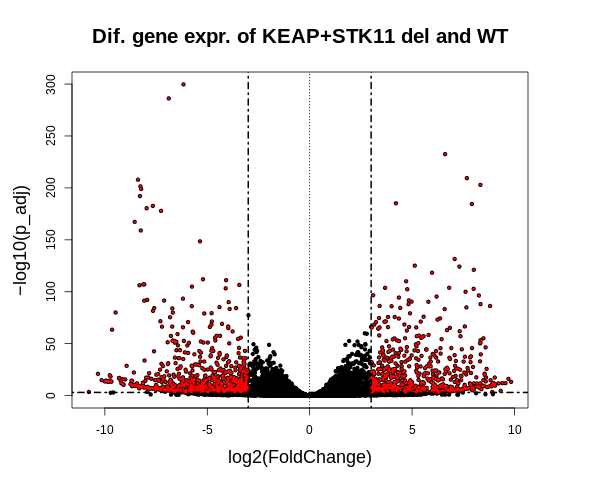

In [114]:
%%R -w 600

#Задаём размер текста и композицию графика
par(mar=c(5,5,5,5), cex=1.0, cex.main=1.7, cex.axis=1, cex.lab=1.5)

#Отрисовываем все точки чёрным цветом
with(res2, plot(log2FoldChange, -log10(padj), pch=20, main="Dif. gene expr. of KEAP+STK11 del and WT", cex=1.0, xlab="log2(FoldChange)", ylab="−log10(p_adj)"))

#Отрисовываем точки, прошедшие порог, красным цветом
with(subset(res2, padj<0.001 & abs(log2FoldChange)>3), points(log2FoldChange, -log10(padj), pch=20, col="red", cex=0.5))

imechki_2 <- rownames(subset(res2, padj<0.001 & abs(log2FoldChange)>3))
#Отрисовываем линии с порогами
abline(v=0, col="black", lty=3, lwd=1.0)
abline(v=-3, col="black", lty=4, lwd=2.0)
abline(v=3, col="black", lty=4, lwd=2.0)
abline(h=3, col="black", lty=4, lwd=2.0)

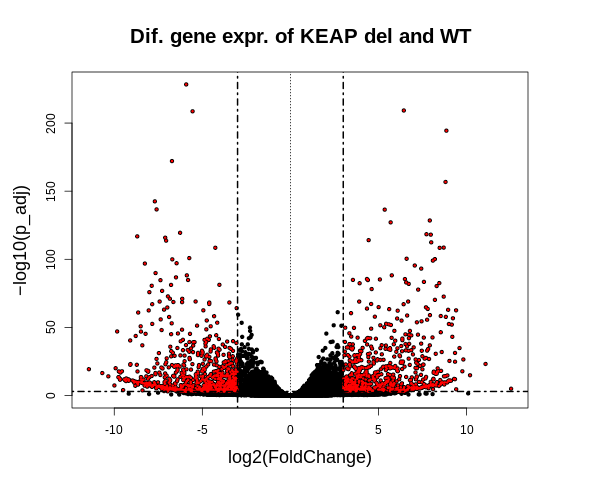

In [74]:
%%R -w 600

#Задаём размер текста и композицию графика
par(mar=c(5,5,5,5), cex=1.0, cex.main=1.7, cex.axis=1, cex.lab=1.5)

#Отрисовываем все точки чёрным цветом
with(res3, plot(log2FoldChange, -log10(padj), pch=20, main="Dif. gene expr. of KEAP del and WT", cex=1.0, xlab="log2(FoldChange)", ylab="−log10(p_adj)"))

#Отрисовываем точки, прошедшие порог, красным цветом
with(subset(res3, padj<0.001 & abs(log2FoldChange)>3), points(log2FoldChange, -log10(padj), pch=20, col="red", cex=0.5))


imechki_3 <- rownames(subset(res3, padj<0.001 & abs(log2FoldChange)>3))
#Отрисовываем линии с порогами
abline(v=0, col="black", lty=3, lwd=1.0)
abline(v=-3, col="black", lty=4, lwd=2.0)
abline(v=3, col="black", lty=4, lwd=2.0)
abline(h=3, col="black", lty=4, lwd=2.0)

In [93]:
import rpy2.robjects as robjects

In [121]:

set1 =  set(robjects.r['imechki_1'])
set2 =  set(robjects.r['imechki_3'])
set3 =  set(robjects.r['imechki_2'])

print('Вырубили STK11: поменялась эксперессия у ',len(set1),'генов')
print('Вырубили KEAP: поменялась эксперессия у ',len(set3),'генов')
print('Вырубили оба: поменялась эксперессия у ',len(set2),'генов')

Вырубили STK11: поменялась эксперессия у  18 генов
Вырубили KEAP: поменялась эксперессия у  1372 генов
Вырубили оба: поменялась эксперессия у  1488 генов


In [123]:
#Мы видим, что дифференциально экспрессированные гены в случае, когда мы отключаем оба гена,
#не могут быть суммой генов, когда откулючлись STK11 и KEAP по отдельности, так как их число превосходит сумму тех. 
#Это может быть связано с тем, что белки, эксперессируемые данными генами, 
#являются участниками путей по производству транскрипционных факторов других генов. И имеет место концентрационный фактор 
#или просто важно наличие хотя бы одного из белков, так как белки даже с 1 гена худо-бедно справляется с задачей.
#Причём KEAP кодирует более значимые белки, тк его нокаут привёл к серьёзным изменениям.
